In [1]:
#Importing all the necessary Libraries
import numpy as np 
import pandas as pd 
import pywt
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patheffects as PathEffects
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

import keras
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 

Using TensorFlow backend.


In [2]:
#Attach the path to your dataset.
df=pd.read_csv('D:/TEOAE/eardataset.csv')
df=pd.read_csv('D:/TEOAE/eardataset.csv', encoding = "ISO-8859-1")

In [3]:
df_again = pd.read_csv('D:/TEOAE/eardataset.csv')
df_again.head(3)

,unnamed,subject,session,ear,buffer,block,data_0,data_1,data_2,data_3,...,data_650,data_651,data_652,data_653,data_654,data_655,data_656,data_657,data_658,data_659
0,40,0,0,left,A,40,0.000062,0.000063,0.000064,0.000067,...,-0.000046,-0.000048,-0.000049,-0.000051,-0.000052,-0.000052,-0.000053,-0.000053,-0.000052,-0.000051
1,41,0,0,left,A,41,0.000063,0.000064,0.000065,0.000067,...,-0.000039,-0.000040,-0.000042,-0.000043,-0.000044,-0.000044,-0.000044,-0.000044,-0.000044,-0.000042
2,42,0,0,left,A,42,0.000065,0.000066,0.000067,0.000069,...,-0.000042,-0.000043,-0.000045,-0.000046,-0.000047,-0.000047,-0.000047,-0.000047,-0.000047,-0.000045


In [4]:
df_again=df_again.drop(["unnamed", "session","ear","buffer","block"],axis=1)

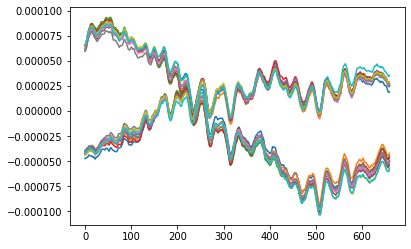

In [5]:
#View the signals in the dataset
for i in range(0,20):
    disp = df_again.iloc[i,1:661].values
    plt.plot(disp)
#10 consecutive signals are similar in a dataset while the next consecutive 10 are not.

In [6]:
#creating a dataFrame for the dataset
def subject0(subjectno, sessionno, earname, bufferid):
    dfu0=df.groupby(['subject', 'session', 'ear', 'buffer']).get_group((subjectno, sessionno, earname, bufferid)).iloc[-10:]
    return dfu0

x=subject0(34,0,'left','B')
x['subject'].iloc[0]
print(x.shape)
print(x)

(10, 666)
      unnamed  subject  session   ear buffer  block    data_0    data_1  \
2730    30662       34        0  left      B    272  0.000014  0.000013   
2731    30663       34        0  left      B    273  0.000014  0.000013   
2732    30664       34        0  left      B    274  0.000014  0.000013   
2733    30665       34        0  left      B    275  0.000015  0.000014   
2734    30666       34        0  left      B    276  0.000014  0.000013   
2735    30667       34        0  left      B    277  0.000014  0.000014   
2736    30668       34        0  left      B    278  0.000014  0.000014   
2737    30669       34        0  left      B    279  0.000013  0.000013   
2738    30670       34        0  left      B    280  0.000014  0.000014   
2739    30671       34        0  left      B    281  0.000015  0.000014   

        data_2    data_3  ...  data_650  data_651  data_652  data_653  \
2730  0.000013  0.000013  ...  0.000013  0.000012  0.000011  0.000011   
2731  0.000013  0.

In [7]:
#Creating Input and Labels DataFrame

allInputTEOAEsignalsAllSubjects = pd.DataFrame([])
allOutputLabelsAllSubjects = pd.DataFrame([])
for a in range(54):
    print(a)
    df1 = pd.DataFrame([])
    b=[0,1]              # sessions 0 and 1
    c=['left','right']   # ears 
    d=['A','B']          # buffers
    
    allFeatures =  pd.DataFrame([])
    allInputFeatures =  pd.DataFrame([])
    outputLabel =  pd.DataFrame([])
    fftValues =  pd.DataFrame([])
    psdValues =  pd.DataFrame([])
    autocorrValues = pd.DataFrame([])
        
    for q,r,s in [(q,r,s) for q in b for r in c for s in d]:
        
        # df1 contains all the 80 TEOAE signals of subject a
        df1 = df1.append(subject0(a,q,r,s))
        allInputFeatures = df1.iloc[:,6:]
    
    allInputTEOAEsignalsAllSubjects = pd.concat([allInputTEOAEsignalsAllSubjects.reset_index(drop=True),
                                                 allInputFeatures.reset_index(drop=True)], axis=0)
    # the following gets you the class label <= subject no.[0,1,2,...,53]
    outputLabel = df1.iloc[:,1] 
    print("OutputLabel:",outputLabel)
    #allOutputLabelsAllSubjects = allOutputLabelsAllSubjects.append(outputLabel)
    #append didn't work for output so using pd.cat instead
    allOutputLabelsAllSubjects = pd.concat([allOutputLabelsAllSubjects.reset_index(drop=True),
                                            outputLabel.reset_index(drop=True)], axis=0)
    print(allInputTEOAEsignalsAllSubjects.shape)
    print(allOutputLabelsAllSubjects.shape)


0
OutputLabel: 0     0
1     0
2     0
3     0
4     0
     ..
75    0
76    0
77    0
78    0
79    0
Name: subject, Length: 80, dtype: int64
(80, 660)
(80, 1)
1
OutputLabel: 80     1
81     1
82     1
83     1
84     1
      ..
155    1
156    1
157    1
158    1
159    1
Name: subject, Length: 80, dtype: int64
(160, 660)
(160, 1)
2
OutputLabel: 160    2
161    2
162    2
163    2
164    2
      ..
235    2
236    2
237    2
238    2
239    2
Name: subject, Length: 80, dtype: int64
(240, 660)
(240, 1)
3
OutputLabel: 240    3
241    3
242    3
243    3
244    3
      ..
315    3
316    3
317    3
318    3
319    3
Name: subject, Length: 80, dtype: int64
(320, 660)
(320, 1)
4
OutputLabel: 320    4
321    4
322    4
323    4
324    4
      ..
395    4
396    4
397    4
398    4
399    4
Name: subject, Length: 80, dtype: int64
(400, 660)
(400, 1)
5
OutputLabel: 400    5
401    5
402    5
403    5
404    5
      ..
475    5
476    5
477    5
478    5
479    5
Name: subject, Length: 80, dt

OutputLabel: 3600    45
3601    45
3602    45
3603    45
3604    45
        ..
3675    45
3676    45
3677    45
3678    45
3679    45
Name: subject, Length: 80, dtype: int64
(3680, 660)
(3680, 1)
46
OutputLabel: 3680    46
3681    46
3682    46
3683    46
3684    46
        ..
3755    46
3756    46
3757    46
3758    46
3759    46
Name: subject, Length: 80, dtype: int64
(3760, 660)
(3760, 1)
47
OutputLabel: 3760    47
3761    47
3762    47
3763    47
3764    47
        ..
3835    47
3836    47
3837    47
3838    47
3839    47
Name: subject, Length: 80, dtype: int64
(3840, 660)
(3840, 1)
48
OutputLabel: 3840    48
3841    48
3842    48
3843    48
3844    48
        ..
3915    48
3916    48
3917    48
3918    48
3919    48
Name: subject, Length: 80, dtype: int64
(3920, 660)
(3920, 1)
49
OutputLabel: 3920    49
3921    49
3922    49
3923    49
3924    49
        ..
3995    49
3996    49
3997    49
3998    49
3999    49
Name: subject, Length: 80, dtype: int64
(4000, 660)
(4000, 1)
50
Outpu

In [8]:
# save extracted dataframe locally
X=pd.DataFrame([])
y=pd.DataFrame([])
xsave = pd.DataFrame([])
ysave = pd.DataFrame([])
X = allInputTEOAEsignalsAllSubjects
y = allOutputLabelsAllSubjects
xsave = X
ysave = y
#xsave.to_pickle('dataX.pkl')
#ysave.to_pickle('labelY.pkl')

In [9]:
#Splitting 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
#Checking the dimensions of train and test array
print(np.asarray(X_train).shape)
print(np.asarray(X_test).shape)
print(np.asarray(y_train).shape)
print(np.asarray(y_test).shape)
labels_train = list(map(lambda x: int(x), np.asarray(y_train)))
print(np.asarray(labels_train).shape)

(3456, 660)
(864, 660)
(3456, 1)
(864, 1)
(3456,)


In [11]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [12]:
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot

train_size = X_train.shape[0]
test_size= X_test.shape[0]
rp = RecurrencePlot(threshold='point', percentage=20)

#########################################################
### creating a tensor to store CWT matrices of train egs#
#########################################################
train_data_cwt = np.ndarray(shape=(train_size, 660, 660)) 

for ii in range(0,train_size):
    if ii % 50 == 0: #len(X_train) == 0:
        print(ii)
    signal = X_train[[ii]]
    X_rp = rp.fit_transform(signal)
    coeff_ = X_rp[:,:660]
    train_data_cwt[ii, :, :] = coeff_
    #train_data_cwt[:, :, ii] = coeff_

###########################################################
### creating a tensor to store CWT matrices of test egs ###
###########################################################
test_data_cwt = np.ndarray(shape=(test_size, 660, 660))

for ii in range(0,test_size):
    if ii % 50 == 0:
        print(ii)
    signal = X_test[[ii]]
    X_rp = rp.fit_transform(signal)
    coeff_ = X_rp[:,:660]
    test_data_cwt[ii, :, :] = coeff_
    #test_data_cwt[:, :, ii] = coeff_

###########################################################
### convert the labels from float to int of train and test egs
###########################################################
labels_train = list(map(lambda x: int(x), np.asarray(y_train)))
labels_test = list(map(lambda x: int(x), np.asarray(y_test)))

###########################################################
### putting all the train and test CWT data             ###
###########################################################
x_train = train_data_cwt
y_train = list(labels_train[:train_size])
x_test = test_data_cwt
y_test = list(labels_test[:test_size])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850


In [13]:
#Convert the labels to array
y_test_np = np.asarray(y_test)
y_train_np = np.asarray(y_train)

In [14]:
print(np.asarray(x_train).shape)
print(np.asarray(x_test).shape)
print(np.asarray(y_train).shape)
print(np.asarray(y_test).shape)
print(len(x_train))
print(len(x_test))

(3456, 660, 660)
(864, 660, 660)
(3456,)
(864,)
3456
864


###### Feature extraction by CNN

In [15]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense,Activation, Conv2D, MaxPool2D , Flatten
#AlexNet:

model = AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(660,660,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
AlexNet.add(Dense(1000, activation='relu'))
AlexNet.summary()













_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 165, 165, 96)      34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 165, 165, 96)      384       
_________________________________________________________________
activation_1 (Activation)    (None, 165, 165, 96)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 83, 83, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 83, 83, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 83, 83, 256)       1024      
_________________________________________________________________
activation_2 (Activation)    (None, 83, 83, 256)       0        

In [16]:
#AlexNet
num_classes=54
x_train_cnn = x_train.reshape(3456,660,660,1)#len(x_train),img_x, img_y, img_z)
x_test_cnn = x_test.reshape(864,660,660,1)#len(x_test),img_x, img_y, img_z)
rgb_train = np.repeat(x_train_cnn, 3, -1)
rgb_test = np.repeat(x_test_cnn,3,-1)

In [17]:
#Compile the Model
AlexNet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
#obtain the flattened output for training
features_xtrain=AlexNet.predict(rgb_train) #training
print(features_xtrain.shape)

(3456, 1000)


In [20]:
#Flattened output for Testing
features_xtest=AlexNet.predict(rgb_test) #testing
features_xtest.shape

(864, 1000)

In [21]:
print(features_xtrain.shape)
print(features_xtest.shape)

(3456, 1000)
(864, 1000)


### Classification

In [22]:
 #SVM classifier
svm=SVC()
svm.fit(features_xtrain,y_train_np)

#training accuracy
acc_svm_train=round(svm.score(features_xtrain,y_train_np)*100,2)
print("Training Accuracy:",acc_svm_train)

#testing accuracy
t0 = time.clock()
acc_svm_test=round(svm.score(features_xtest,y_test_np)*100,2)
print("Testing accuracy:",acc_svm_test)
t1= (time.clock() - t0)
print("Svm time:",t1)

Training Accuracy: 95.75


C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


Testing accuracy: 88.19
Svm time: 6.772842299999866


C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


In [23]:
# MLP classification
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,150,100), max_iter=50, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=0,tol=0.000001)
mlp_clf.fit(features_xtrain, y_train_np)
t0 = time.clock()
pred_test = mlp_clf.predict(features_xtest) #testing accuracy
t1= time.clock() - t0
print("MLP time:", t1)
print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

Iteration 1, loss = 3.99486423
Iteration 2, loss = 3.97352777
Iteration 3, loss = 3.93615850
Iteration 4, loss = 3.85646907
Iteration 5, loss = 3.74370942
Iteration 6, loss = 3.63874064
Iteration 7, loss = 3.55383163
Iteration 8, loss = 3.47984825
Iteration 9, loss = 3.38232053
Iteration 10, loss = 3.28437703
Iteration 11, loss = 3.18581716
Iteration 12, loss = 3.08728518
Iteration 13, loss = 2.99127734
Iteration 14, loss = 2.87266488
Iteration 15, loss = 2.76876115
Iteration 16, loss = 2.65111535
Iteration 17, loss = 2.53984005
Iteration 18, loss = 2.44605924
Iteration 19, loss = 2.32877774
Iteration 20, loss = 2.23623296
Iteration 21, loss = 2.11634719
Iteration 22, loss = 2.01060800
Iteration 23, loss = 1.92801735
Iteration 24, loss = 1.86119534
Iteration 25, loss = 1.75133411
Iteration 26, loss = 1.66452576
Iteration 27, loss = 1.58835557
Iteration 28, loss = 1.50941089
Iteration 29, loss = 1.44055708
Iteration 30, loss = 1.35648608
Iteration 31, loss = 1.29195824
Iteration 32, los

C:\Users\SSN-IT\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


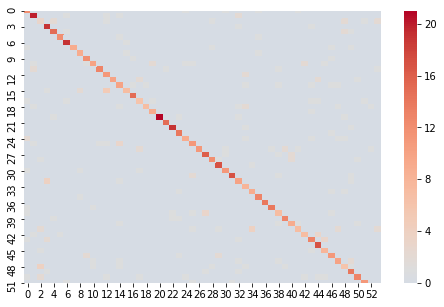

In [24]:
# Plotting the Confusion matrix
cm = confusion_matrix(y_test_np, pred_test)
plt.figure(figsize=(8,5))
sns.heatmap(cm, center=True, cmap='coolwarm')
plt.show()

In [25]:
#Random Forest Classifier

# Create the model with 100 trees
model_rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model_rf.fit(features_xtrain, y_train_np)
t0 = time.clock()
pred_test = model_rf.predict(features_xtest) #testing accuracy
t1= time.clock() - t0
print("RF time:", t1)

print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


RF time: 0.14681369999993876
Accuracy: 
96.75925925925925
Confusion Matrix :
[[16  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 22]]
Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.96      1.00      0.98        25
           2       0.91      0.83      0.87        12
           3       0.95      1.00      0.98        21
           4       1.00      1.00      1.00        19
           5       0.93      0.93      0.93        14
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        13
           8       0.85      1.00      0.92        11
           9       0.88      1.00      0.93        14
          10       0.84      0.84      0.84        19
          11       0.89      0.89      0.89        18
          12       1.00      1.00      1.00        13


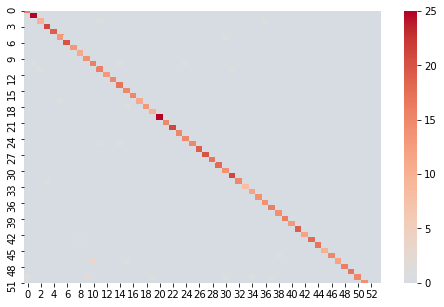

In [26]:
# Plotting the Confusion matrix
cm = confusion_matrix(y_test_np, pred_test)

plt.figure(figsize=(8,5))
sns.heatmap(cm, center=True, cmap='coolwarm')
plt.show()

In [27]:
# K nearest neighbours algorithm 
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(features_xtrain, y_train_np) 
t0 =time.clock()
pred_test = knn.predict(features_xtest) #testing accuracy
t1= time.clock() -t0
print("KNN time", t1)
print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


KNN time 1.674350400000094
Accuracy: 
95.13888888888889
Confusion Matrix :
[[16  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  1 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 22]]
Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.92      0.96      0.94        25
           2       1.00      0.83      0.91        12
           3       0.84      1.00      0.91        21
           4       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        20
           7       0.93      1.00      0.96        13
           8       1.00      1.00      1.00        11
           9       0.82      1.00      0.90        14
          10       1.00      0.79      0.88        19
          11       0.88      0.83      0.86        18
          12       0.85      0.85      0.85        13
  

C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


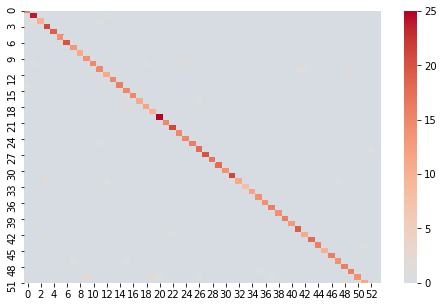

In [28]:
cm = confusion_matrix(y_test_np, pred_test)

plt.figure(figsize=(8,5))
sns.heatmap(cm, center=True, cmap='coolwarm')
plt.show()

In [29]:
# XGBoost classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(features_xtrain, y_train_np)
t0 = time.clock()
pred_test = model.predict(features_xtest) #testing accuracy
t1= time.clock() - t0
print("XGBoost time :", t1)
print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

C:\Users\SSN-IT\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost time : 0.09176550000029238
Accuracy: 
92.93981481481481
Confusion Matrix :
[[16  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  1  7 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 22]]
Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.85      0.92      0.88        25
           2       0.78      0.58      0.67        12
           3       1.00      0.95      0.98        21
           4       0.90      0.95      0.92        19
           5       0.87      0.93      0.90        14
           6       0.90      0.95      0.93        20
       

C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\Users\SSN-IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


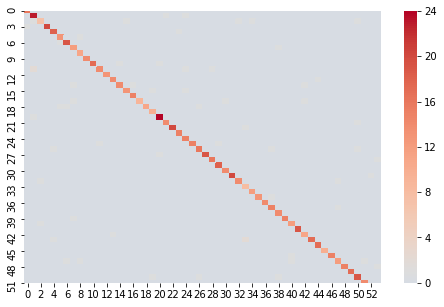

In [30]:
cm = confusion_matrix(y_test_np, pred_test)

plt.figure(figsize=(8,5))
sns.heatmap(cm, center=True, cmap='coolwarm')
plt.show()